In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [30]:
df = pd.read_csv("/Users/alikhansainov/Desktop/Python/ML-project/data.csv")



In [31]:
cdf = df[['Price', 'Minutes to metro', 'Area', 'Living area', 'Number of floors']]
cdf.head(9)

,Price,Minutes to metro,Area,Living area,Number of floors
0,6300000.0,6.0,30.6,11.1,25
1,9000000.0,2.0,49.2,20.0,15
2,11090000.0,14.0,44.7,16.2,25
3,8300000.0,8.0,35.1,16.0,33
4,6450000.0,6.0,37.7,15.2,5
5,7150000.0,6.0,38.4,18.0,18
6,7400000.0,11.0,33.0,16.0,7
7,7500000.0,27.0,25.0,14.8,34
8,7800000.0,6.0,41.8,18.0,17


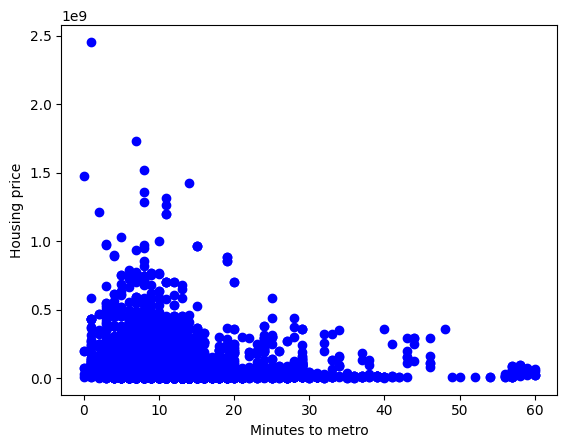

In [33]:
plt.scatter(cdf['Minutes to metro'], cdf['Price'],  color='blue')
plt.xlabel("Minutes to metro")
plt.ylabel("Housing price")
plt.show()

In [34]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

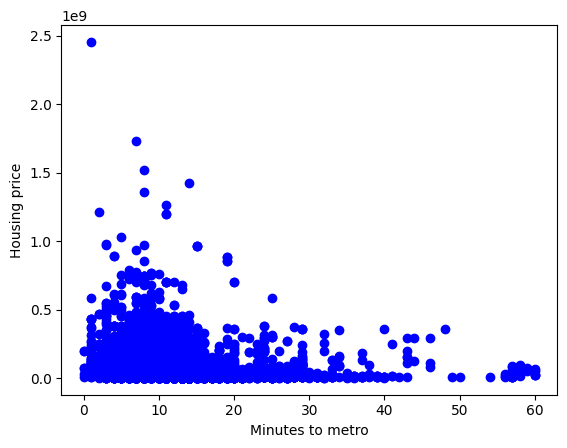

In [36]:
plt.scatter(train['Minutes to metro'], train['Price'],  color='blue')
plt.xlabel("Minutes to metro")
plt.ylabel("Housing price")
plt.show()

In [39]:
# Multiple Regression Model

from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Minutes to metro', 'Area', 'Living area', 'Number of floors']])
y = np.asanyarray(train[['Price']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-433319.45010247 1042455.74122784 -155801.93186028 -478186.61023413]]


In [43]:
y_hat= regr.predict(test[['Minutes to metro', 'Area', 'Living area', 'Number of floors']])
x = np.asanyarray(test[['Minutes to metro', 'Area', 'Living area', 'Number of floors']])
y = np.asanyarray(test[['Price']])
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Mean Squared Error (MSE) : 2368224942567910.00
Variance score: 0.64


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
